In [3]:
# Data exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from NYC_GetCleaned_Events import getCleanedEventsData

In [4]:
cleanedEvents = getCleanedEventsData()
cleanedEvents.head()

,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Police Precinct
0,84.0,I Love NY,02/14/2008 06:00:00 AM,02/14/2008 06:00:00 PM,Street Activity Permit Office,Special Event,Manhattan,BROADWAY between WEST 43 STREET and WEST ...,"14,"
1,85.0,Path to Peace,03/20/2008 06:00:00 AM,03/20/2008 10:00:00 PM,Street Activity Permit Office,Special Event,Manhattan,BROADWAY between WEST 43 STREET and WEST ...,"14,"
2,86.0,Zoom Media/Pepsi,01/21/2008 05:00:00 AM,01/22/2008 01:00:00 AM,Street Activity Permit Office,Special Event,Manhattan,BROADWAY between WEST 43 STREET and WEST ...,"14,"
3,89.0,Union Square Street Sessions,02/07/2008 03:00:00 PM,02/07/2008 09:00:00 PM,Parks Department,Special Event,Manhattan,EAST 17 STREET between PARK AVENUE SOUTH,"13,"
4,90.0,Central Park Winter Jam,02/09/2008 12:00:00 PM,02/09/2008 04:00:00 PM,Parks Department,Special Event,Manhattan,72 STREET TRANSVERSE between 5 AVENUE,"19,"


In [6]:
dfCopy = cleanedEvents.copy()
def eliminate_dates(x):
    if x[2] > '2050':
        x = None
    elif x[2] < '2008':
        x = None
    else:
        aa= '/'.join(x)
        return (aa)

#get dummy columns for crime categories
dfCopy = dfCopy.join(dfCopy['Event Borough'].str.get_dummies())

#Create index with DateTime
dfCopy['Start Date/Time'] = dfCopy['Start Date/Time'].str.split("/")
dfCopy['Start Date/Time'] = dfCopy['Start Date/Time'].apply(lambda x: eliminate_dates(x))

#Combing date and time columns
dfCopy['StartTime'] = dfCopy['Start Date/Time']
dfCopy['StartTime'] = pd.to_datetime(dfCopy['StartTime'])

#set full date as index
dfCopy.set_index('StartTime', inplace=True)          

dfCopy.head()

,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Police Precinct,Bronx,Brooklyn,Manhattan,Queens,Staten Island
StartTime,,,,,,,,,,,,,,
2008-02-14 06:00:00,84.0,I Love NY,02/14/2008 06:00:00 AM,02/14/2008 06:00:00 PM,Street Activity Permit Office,Special Event,Manhattan,BROADWAY between WEST 43 STREET and WEST ...,"14,",0,0,1,0,0
2008-03-20 06:00:00,85.0,Path to Peace,03/20/2008 06:00:00 AM,03/20/2008 10:00:00 PM,Street Activity Permit Office,Special Event,Manhattan,BROADWAY between WEST 43 STREET and WEST ...,"14,",0,0,1,0,0
2008-01-21 05:00:00,86.0,Zoom Media/Pepsi,01/21/2008 05:00:00 AM,01/22/2008 01:00:00 AM,Street Activity Permit Office,Special Event,Manhattan,BROADWAY between WEST 43 STREET and WEST ...,"14,",0,0,1,0,0
2008-02-07 15:00:00,89.0,Union Square Street Sessions,02/07/2008 03:00:00 PM,02/07/2008 09:00:00 PM,Parks Department,Special Event,Manhattan,EAST 17 STREET between PARK AVENUE SOUTH,"13,",0,0,1,0,0
2008-02-09 12:00:00,90.0,Central Park Winter Jam,02/09/2008 12:00:00 PM,02/09/2008 04:00:00 PM,Parks Department,Special Event,Manhattan,72 STREET TRANSVERSE between 5 AVENUE,"19,",0,0,1,0,0


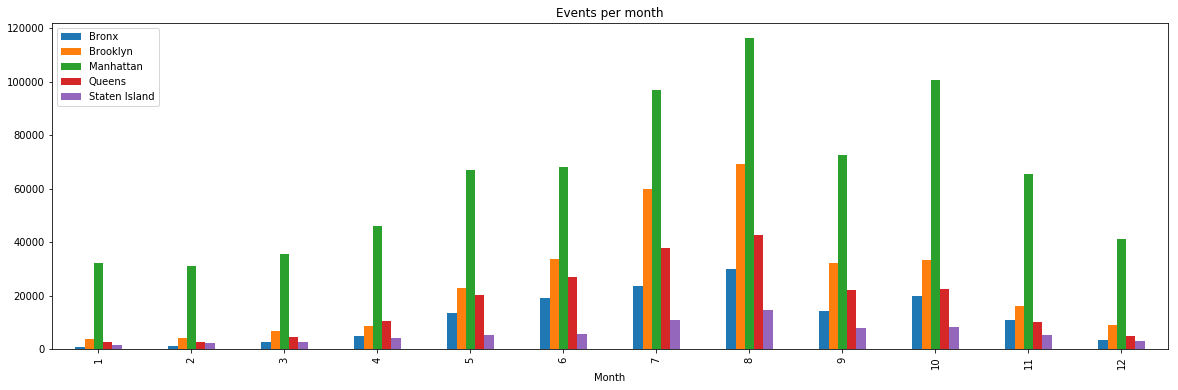

In [14]:
dfMonth = dfCopy.copy()
dfMonth.index = dfMonth.index.month
vis1 = dfMonth.groupby([dfMonth.index.get_level_values(0)])[['Bronx','Brooklyn','Manhattan','Queens','Staten Island']].sum()

vis1.plot.bar(figsize=(20,6))
plt.title('Events per month')
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.show()

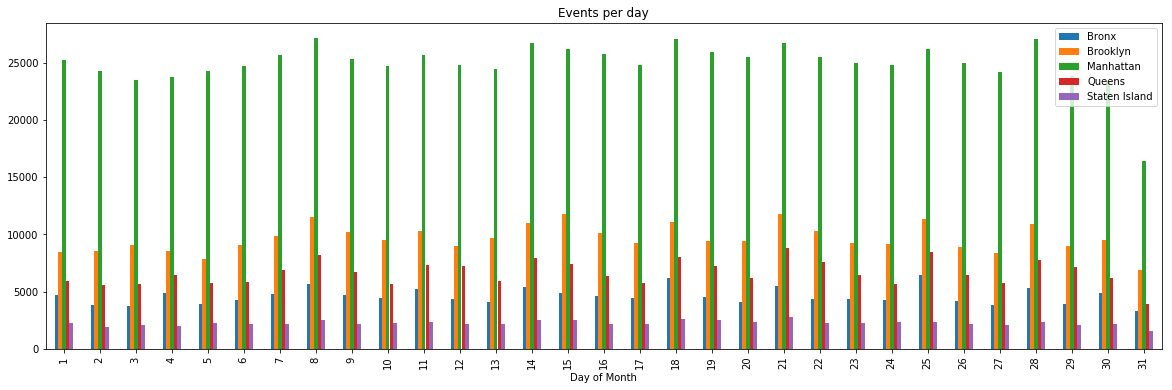

In [13]:
dfDay = dfCopy.copy() 
dfDay.index = dfDay.index.day
vis2 = dfDay.groupby([dfDay.index.get_level_values(0)])[['Bronx','Brooklyn','Manhattan','Queens','Staten Island']].sum()

vis2.plot.bar(figsize=(20,6))
plt.title('Events per day')
plt.xlabel('Day of Month')
plt.show()